In [0]:
%matplotlib inline

In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

W0825 12:53:12.654603 139727748306816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 12:53:12.692925 139727748306816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 12:53:12.700205 139727748306816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 12:53:12.712319 139727748306816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 12:53:12.713154 1397277483

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.2542 - acc: 0.9219 - val_loss: 0.0672 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0883 - acc: 0.9743 - val_loss: 0.0445 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0650 - acc: 0.9810 - val_loss: 0.0356 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0471 - acc: 0.9859 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0405 - acc: 0.9880 - val_loss: 0.0303 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0322 - val_ac

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
    

Test score: 0.027698707123306805
Test accuracy: 0.9911


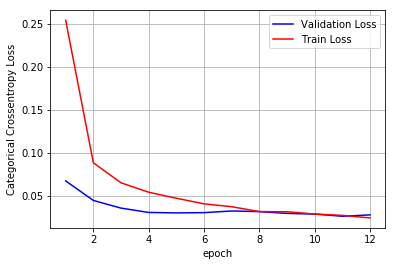

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.3048 - acc: 0.9031 - val_loss: 0.0524 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0883 - acc: 0.9732 - val_loss: 0.0275 - val_acc: 0.9898
Epoch 3/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0634 - acc: 0.9812 - val_loss: 0.0250 - val_acc: 0.9921
Epoch 4/12
60000/60000 [==============================] - 6s 92us/step - loss: 0.0520 - acc: 0.9846 - val_loss: 0.0246 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0427 - acc: 0.9882 - val_loss: 0.0181 - val_acc: 0.9948
Epoch 6/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0389 - acc: 0.9885 - val_loss: 0.0176 - val_acc: 0.9944
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0331 - acc: 0.9902 - val_loss: 0.0167 - val_ac

Test score: 0.01734484681326394
Test accuracy: 0.995


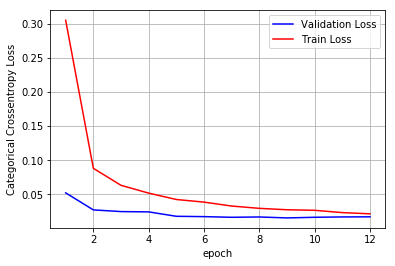

In [0]:
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
           
model2.add(Conv2D(128, (2, 2), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
           
model2.add(Conv2D(256, (1, 1), activation='relu'))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
           
model2.add(Conv2D(512, (1, 1), activation='relu'))
model2.add(Conv2D(512, (1, 1), activation='relu'))
model2.add(Dropout(0.5))
           
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.5535 - acc: 0.8159 - val_loss: 0.0579 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0698 - acc: 0.9815 - val_loss: 0.0423 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0454 - acc: 0.9884 - val_loss: 0.0332 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0352 - acc: 0.9911 - val_loss: 0.0494 - val_acc: 0.9863
Epoch 5/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0274 - acc: 0.9928 - val_loss: 0.0280 - val_acc: 0.9933
Epoch 6/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0195 - acc: 0.9953 - val_loss: 0.0334 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 7s 111us/step - loss: 0.0162 - acc: 0.9955 - val_loss: 0.0371 - 

Test score: 0.036298991786985424
Test accuracy: 0.9938


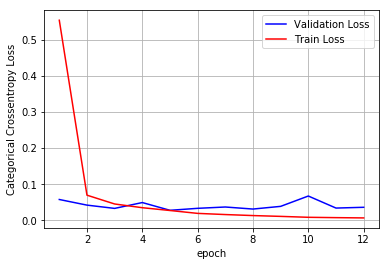

In [0]:
score = model2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
           
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
           
           
model3.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model3.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
           
           
model3.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model3.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
           

model3.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model3.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model3.add(Dropout(0.5))
           
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 82s 1ms/step - loss: 2.3017 - acc: 0.1099 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 74s 1ms/step - loss: 2.3016 - acc: 0.1122 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 74s 1ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 73s 1ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 73s 1ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 74s 1ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc

Test score: 0.04327150229863473
Test accuracy: 0.9911


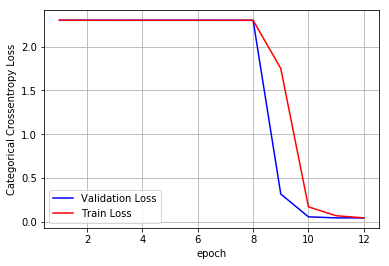

In [0]:
score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
from keras.layers.normalization import BatchNormalization


In [0]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(BatchNormalization())

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 109us/step - loss: 0.1664 - acc: 0.9500 - val_loss: 0.0469 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0740 - acc: 0.9779 - val_loss: 0.0394 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.0550 - acc: 0.9844 - val_loss: 0.0375 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0473 - acc: 0.9866 - val_loss: 0.0371 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 6s 93us/step - loss: 0.0403 - acc: 0.9886 - val_loss: 0.0420 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0344 - acc: 0.9899 - val_loss: 0.0431 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.0514 - val_ac

Test score: 0.040212269348834435
Test accuracy: 0.9919


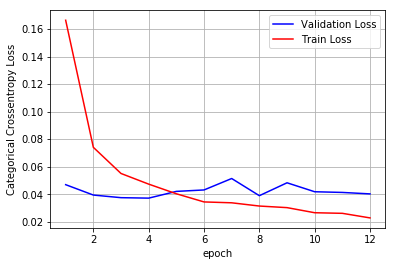

In [0]:
score = model4.evaluate(x_test, y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))
model5.add(Flatten())
model5.add(BatchNormalization())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.1670 - acc: 0.9471 - val_loss: 0.0498 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0627 - acc: 0.9810 - val_loss: 0.0321 - val_acc: 0.9904
Epoch 3/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0466 - acc: 0.9860 - val_loss: 0.0299 - val_acc: 0.9908
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0402 - acc: 0.9879 - val_loss: 0.0235 - val_acc: 0.9933
Epoch 5/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0361 - acc: 0.9894 - val_loss: 0.0290 - val_acc: 0.9925
Epoch 6/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0317 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0279 - acc: 0.9917 - val_loss: 0.0186 - 

Test score: 0.026721200305203367
Test accuracy: 0.9939


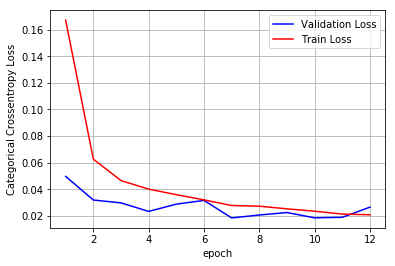

In [0]:
score = model5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())           
model6.add(Conv2D(128, (2, 2), activation='relu'))
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())           
model6.add(Conv2D(256, (1, 1), activation='relu'))
model6.add(Conv2D(256, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())           
model6.add(Conv2D(512, (1, 1), activation='relu'))
model6.add(Conv2D(512, (1, 1), activation='relu'))
model6.add(Dropout(0.5))
           
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

W0825 13:46:38.620599 139727748306816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3196 - acc: 0.9014 - val_loss: 0.0711 - val_acc: 0.9827
Epoch 2/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0626 - acc: 0.9848 - val_loss: 0.0640 - val_acc: 0.9827
Epoch 3/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.0419 - acc: 0.9893 - val_loss: 0.0478 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0306 - acc: 0.9925 - val_loss: 0.0373 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0214 - acc: 0.9944 - val_loss: 0.0335 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0194 - acc: 0.9951 - val_loss: 0.0337 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0117 - acc: 0.9973 - val_loss: 0.0289 - 

Test score: 0.03317512147026634
Test accuracy: 0.9938


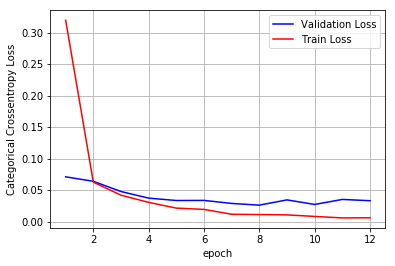

In [0]:
score = model6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [0]:
model6 = Sequential()
model6.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model6.add(Conv2D(64, (2, 2), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model6.add(BatchNormalization())           
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model6.add(BatchNormalization())           
           
model6.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model6.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model6.add(BatchNormalization())           
           
model6.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model6.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model6.add(BatchNormalization())           

model6.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model6.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model6.add(Dropout(0.5))
           
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.5892 - acc: 0.7785 - val_loss: 0.1191 - val_acc: 0.9700
Epoch 2/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0634 - acc: 0.9846 - val_loss: 0.0474 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0374 - acc: 0.9912 - val_loss: 0.0278 - val_acc: 0.9922
Epoch 4/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0263 - acc: 0.9937 - val_loss: 0.0310 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0204 - acc: 0.9952 - val_loss: 0.0329 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0140 - acc: 0.9966 - val_loss: 0.0399 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0134 - acc: 0.9968 - val_loss: 0.0303 - val_acc

Test score: 0.027970264513540406
Test accuracy: 0.9944


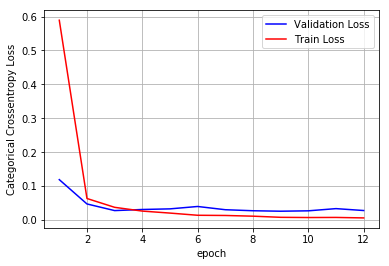

In [0]:
score = model6.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [6]:
model7 = Sequential()
model7.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(BatchNormalization())

model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

W0828 17:09:49.232164 140369395689344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 17:09:49.268569 140369395689344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 17:09:49.275625 140369395689344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 17:09:49.287622 140369395689344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828 17:09:49.288381 1403693956

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.1672 - acc: 0.9499 - val_loss: 0.0436 - val_acc: 0.9859
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0723 - acc: 0.9782 - val_loss: 0.0412 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0553 - acc: 0.9831 - val_loss: 0.0501 - val_acc: 0.9860
Epoch 4/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0480 - acc: 0.9854 - val_loss: 0.0404 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0390 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0370 - acc: 0.9883 - val_loss: 0.0359 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.0372 - val_ac

Test score: 0.03987691695487983
Test accuracy: 0.9913


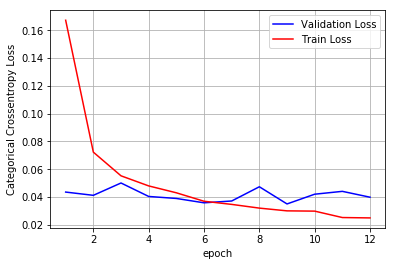

In [7]:
score = model7.evaluate(x_test, y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

In [8]:
model8 = Sequential()
model8.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
model8.add(Conv2D(64, (2, 2), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model8.add(BatchNormalization())           
model8.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model8.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model8.add(BatchNormalization())           
           
model8.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model8.add(Conv2D(256, (4, 4), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model8.add(BatchNormalization())           
           
model8.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model8.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model8.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model8.add(BatchNormalization())           

model8.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model8.add(Conv2D(756, (6, 6), activation='relu', padding='same'))
model8.add(Dropout(0.5))
           
model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.25))
model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

W0828 17:10:58.274101 140369395689344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.4632 - acc: 0.8314 - val_loss: 0.0767 - val_acc: 0.9792
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0679 - acc: 0.9840 - val_loss: 0.0588 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0498 - acc: 0.9879 - val_loss: 0.0355 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0371 - acc: 0.9911 - val_loss: 0.0616 - val_acc: 0.9855
Epoch 5/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0294 - acc: 0.9929 - val_loss: 0.0339 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0273 - acc: 0.9936 - val_loss: 0.0428 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0209 - acc: 0.9956 - val_loss: 0.0351 - val_acc

Test score: 0.0327126224215478
Test accuracy: 0.9931


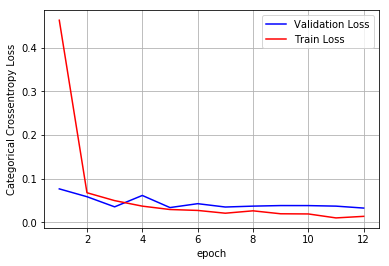

In [9]:
score = model8.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, colors=['b'])

**Pretty Table**

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [" Model Name", "Number of Hidden Layers", "Loss", "Accuracy", "Batch Normalization Used", "Optimizer"]

x.add_row(["Model", 2, 0.026, 0.997, "NO", "Adadelta"])
x.add_row(["Model1", 3, 0.014, 0.995, "NO", "Adadelta"])
x.add_row(["Model2", 8, 0.031, 0.993, "NO", "Adadelta"])
x.add_row(["Model3", 10, 2.30, 0.113, "NO", "Adadelta"])
x.add_row(["Model4", 3, 0.026, 0.993, "YES", "Adadelta"])
x.add_row(["Model5", 8, 0.033, 0.993, "YES", "Adadelta"])
x.add_row(["Model6", 10, 0.027, 0.994, "YES", "Adadelta"])
x.add_row(["Model7", 3, 0.039, 0.991, "YES", "Adam"])
x.add_row(["Model8", 10, 0.032, 0.993, "YES", "Adam"])



print(x)

+-------------+-------------------------+-------+----------+--------------------------+
|  Model Name | Number of Hidden Layers |  Loss | Accuracy | Batch Normalization Used |
+-------------+-------------------------+-------+----------+--------------------------+
|    Model    |            2            | 0.026 |  0.997   |            NO            |
|    Model1   |            3            | 0.014 |  0.995   |            NO            |
|    Model2   |            8            | 0.031 |  0.993   |            NO            |
|    Model3   |            10           |  2.3  |  0.113   |            NO            |
|    Model4   |            3            | 0.026 |  0.993   |           YES            |
|    Model5   |            8            | 0.033 |  0.993   |           YES            |
|    Model6   |            10           | 0.027 |  0.994   |           YES            |
+-------------+-------------------------+-------+----------+--------------------------+


**Conclusion**

1) We generated 7 CNN models with various number of hidden layers with differnt drop out rates, differnt stride length and with and without padding.
2) Our Model1 with 3 hidden layers gave us the best performance in reducing the log loss.
3) Model 3 performed the worst among all our models. This is the only model in which we used padding.
4) Graphs and pretty tables we plotted for better inference of the results.
5) We used batch normalization to observe if it improves results. We observed that models without batch normalization had a lower log loss and performed better.